# Task 1: Text Classification

1.  Download the BBC dataset provided on Moodle. The dataset, created by [Greene and Cunningham, 2006],
is a collection of 2225 documents from the BBC news website already categorized into 5 classes: business,
entertainment, politics, sport, and tech.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_files
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score, f1_score
import sklearn

2. Plot the distribution of the instances in each class and save the graphic in a ﬁle called BBC-distribution.pdf.
You may want to use matplotlib.pyplot and savefig to do this. This pre-analysis of the data set will
allow you to determine if the classes are balanced, and which metric is more appropriate to use to evaluate
the performance of your classiﬁer.

In [2]:
files = load_files('BBC', encoding='latin1')
files_data = np.array(files.data)

In [3]:
targets = files.target_names
business = files_data[files.target == targets.index('business')]
entertainment = files_data[files.target == targets.index('entertainment')]
politics = files_data[files.target == targets.index('politics')]
sport = files_data[files.target == targets.index('sport')]
tech = files_data[files.target == targets.index('tech')]

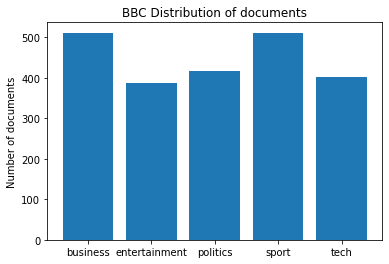

In [4]:
plt.bar(targets, [len(business), len(entertainment), len(politics), len(sport), len(tech)] )
plt.ylabel("Number of documents")
plt.title("BBC Distribution of documents")
plt.savefig('bbc-distribution.pdf')
plt.show()

3. Load the corpus using load files and make sure you set the encoding to latin1. This will read the ﬁle
structure and assign the category name to each ﬁle from their parent directory name.

In [5]:
files = load_files('BBC', encoding='latin1')
files_data = np.array(files.data)

4. Pre-process the dataset to have the features ready to be used by a multinomial Naive Bayes classiﬁer. This means that the frequency of each word in each class must be computed and stored in a term-document matrix. For this, you can use feature extraction.text.CountVectorizer.

In [6]:
vectorizer = sklearn.feature_extraction.text.CountVectorizer()
X = vectorizer.fit_transform(files_data)
y = files.target

5. Split the dataset into 80% for training and 20% for testing. For this, you must use train test split with
the parameter random state set to None.

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None)

6. Train a multinomial Naive Bayes Classiﬁer (naive bayes.MultinomialNB) on the training set using the
default parameters and evaluate it on the test set.

In [8]:
def train_MultinomialNB(X_train, y_train, smoothing=1):
    mb = MultinomialNB(alpha=smoothing).fit(X_train, y_train)
    print(mb.get_params(True))
    return mb

mb = train_MultinomialNB(X_train, y_train)

{'alpha': 1, 'class_prior': None, 'fit_prior': True}


7. In a ﬁle called bbc-performance.txt, save the following information: (to make it easier for the TAs, make
sure that your output for each sub-question below is clearly marked in your output ﬁle, using the headings
(a), (b) . .. )
    1. (a) a clear separator (a sequence of hyphens or stars) and string clearly describing the model (e.g. “Multi-nomialNB default values, try 1”)
    2. (b) the confusion matrix (you can use confusion matrix)
    3. (c) the precision, recall, and F1-measure for each class (you can use classification report)
    4. (d) the accuracy, macro-average F1 and weighted-average F1 of the model (you can use accuracy score and f1 score)
    5. (e) the prior probability of each class
    6. (f) the size of the vocabulary (i.e. the number of diﬀerent words1)
    7. (g) the number of word-tokens in each class (i.e. the number of words in total2)
    8. (h) the number of word-tokens in the entire corpus
    9. (i) the number and percentage of words with a frequency of zero in each class
    10. (j) the number and percentage of words with a frequency of zero in the entire corpus
    11. (k) your 2 favorite words (that are present in the vocabulary) and their log-prob

In [9]:
with open("bbc-performance.txt", "w") as myfile:
    myfile.write('')

# ------------------------------------------
# a) Multi-nomialNB default values, try 1
def a(txt):
    with open("bbc-performance.txt", "a") as myfile:
        myfile.write("------------------------------------------")    
        myfile.write("\n")    
        myfile.write(txt)
        myfile.write("\n")
        myfile.write("\n")
        
a('a) Multi-nomialNB default values, try 1')

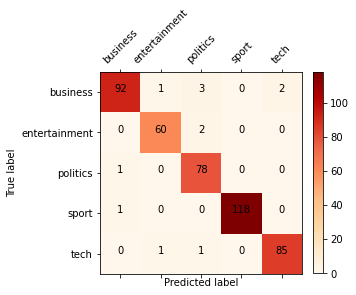

In [10]:
# b) Confusion matrix

def b():
    import itertools

    def get_confusion_matrix(X_test, y_test, y_pred):
        return confusion_matrix(y_test, y_pred)
    y_pred = mb.predict(X_test)
    confusion_m = get_confusion_matrix(X_test, y_test, y_pred)

    plt.matshow(confusion_m, cmap=plt.cm.OrRd)
    plt.colorbar(fraction=0.045)
    tick_marks = np.arange(len(confusion_m))
    plt.xticks(tick_marks, files.target_names, rotation=45)
    plt.yticks(tick_marks, files.target_names)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    for i, j in itertools.product(range(confusion_m.shape[0]), range(confusion_m.shape[1])):
            plt.text(j, i, "{:,}".format(confusion_m[i][j]), horizontalalignment="center")

    with open("bbc-performance.txt", "a") as myfile:
        myfile.write('b) Confusion matrix')
        myfile.write("\n")
        myfile.write(str(confusion_m))
        myfile.write("\n")
        myfile.write("\n")
    
    return y_pred
        
y_pred = b()

In [11]:
# c) precision, recall, and F1-measure for each class

def c(y_pred):
    print(classification_report(y_test, y_pred, target_names=files.target_names))

    with open("bbc-performance.txt", "a") as myfile:
        myfile.write('c) precision, recall, and F1-measure for each class')
        myfile.write('\n')
        myfile.write(classification_report(y_test, y_pred, target_names=files.target_names))
        myfile.write("\n")  
        myfile.write("\n")
        
c(y_pred)

               precision    recall  f1-score   support

     business       0.98      0.94      0.96        98
entertainment       0.97      0.97      0.97        62
     politics       0.93      0.99      0.96        79
        sport       1.00      0.99      1.00       119
         tech       0.98      0.98      0.98        87

     accuracy                           0.97       445
    macro avg       0.97      0.97      0.97       445
 weighted avg       0.97      0.97      0.97       445



In [12]:
# d) accuracy, macro-average F1 and weighted-average F1 of the model

def d(y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    print('Accuracy: {}'.format(accuracy))

    macro_avg_f1 = f1_score(y_test, y_pred, average='macro')
    print('Macro-average F1: {}'.format(macro_avg_f1))

    weighted_avg_f1 = f1_score(y_test, y_pred, average='macro')
    print('Weighted-average F1: {}'.format(weighted_avg_f1))

    with open("bbc-performance.txt", "a") as myfile:
        myfile.write('d) accuracy, macro-average F1 and weighted-average F1 of the model')
        myfile.write('\n')
        myfile.write('Accuracy: {}'.format(accuracy))
        myfile.write("\n")
        myfile.write('Macro-average F1: {}'.format(macro_avg_f1))
        myfile.write("\n")
        myfile.write('Weighted-average F1: {}'.format(weighted_avg_f1))
        myfile.write("\n")
        myfile.write("\n")
        
d(y_pred)

Accuracy: 0.9730337078651685
Macro-average F1: 0.9711845137022607
Weighted-average F1: 0.9711845137022607


In [13]:
# e) prior probability of each class

def e():
    def calculate_priors(class_count):
        return class_count/class_count.sum()

    print('Priors of each class')
    class_count = np.array([len(business), len(entertainment), len(politics), len(sport), len(tech)])
    priors = calculate_priors(class_count)
    for i in range(len(files.target_names)):
        print('{} : {}'.format(files.target_names[i], priors[i]))

    with open("bbc-performance.txt", "a") as myfile:
        myfile.write('e) prior probability of each class')
        myfile.write('\n')
        for i in range(len(files.target_names)):
            myfile.write('{} : {}'.format(files.target_names[i], priors[i]))
            myfile.write("\n")
        myfile.write("\n")

e()

Priors of each class
business : 0.2292134831460674
entertainment : 0.17348314606741572
politics : 0.18741573033707865
sport : 0.22966292134831462
tech : 0.1802247191011236


In [14]:
# f) size of the vocabulary

def f():
    def calulate_vocabulary_size(vectorizer):
        return len(vectorizer.get_feature_names())

    print(calulate_vocabulary_size(vectorizer))

    with open("bbc-performance.txt", "a") as myfile:
        myfile.write('f) size of the vocabulary')
        myfile.write('\n')
        myfile.write(str(calulate_vocabulary_size(vectorizer)))
        myfile.write("\n")
        myfile.write("\n")
f();

29421


In [15]:
# g) number of word-tokens in each class

def g():    
    def get_word_tokens_class(X, targets, files):
        return [X[files.target == targets.index(i)].sum() for i in files.target_names]


    word_tokens_class = get_word_tokens_class(X, targets, files)
    for i in range(len(files.target_names)):
        print('{} : {}'.format(files.target_names[i], word_tokens_class[i]))

    with open("bbc-performance.txt", "a") as myfile:
        myfile.write('g) number of word-tokens in each class')
        myfile.write('\n')
        for i in range(len(files.target_names)):
            myfile.write('{} : {}'.format(files.target_names[i], word_tokens_class[i]))
            myfile.write("\n")
        myfile.write("\n")
        
g()

business : 164663
entertainment : 124893
politics : 185208
sport : 162953
tech : 198640


In [16]:
# h) number of word-tokens in entire corpus

def get_word_tokens_corpus(X):
        return X.sum()
    
def h():
    print(get_word_tokens_corpus(X))

    with open("bbc-performance.txt", "a") as myfile:
        myfile.write('h) number of word-tokens in entire corpus')
        myfile.write('\n')
        myfile.write(str(get_word_tokens_corpus(X)))
        myfile.write("\n")
        myfile.write("\n")
        
h()

836357


In [17]:
# i) number and percentage of words with a frequency of 0 in each class

def i():
    def get_number_and_percentage_words_0_frequency(X, targets, files):
        x, y = X.shape
        res = []
        for i in files.target_names:
            summed = np.sum(X[files.target == targets.index(i)], axis=0)
            j = summed[summed == 0][0].size
            res.append((j, j/y * 100))
        return res

    num_per_0_freq = get_number_and_percentage_words_0_frequency(X, targets, files)
    for i in range(len(files.target_names)):
        print('Number of words with 0 frequency in class {} : {}'.format(files.target_names[i], num_per_0_freq[i][0]))
        print('Percentage of words with 0 frequency in class {} : {:.2f}%'.format(files.target_names[i], num_per_0_freq[i][1]))


    with open("bbc-performance.txt", "a") as myfile:
        myfile.write('i) number and percentage of words with a frequency of 0 in each class')
        myfile.write('\n')
        for i in range(len(files.target_names)):
            myfile.write('Number of words with 0 frequency in class {} : {}'.format(files.target_names[i], num_per_0_freq[i][0]))
            myfile.write("\n")
            myfile.write('Percentage of words with 0 frequency in class {} : {:.2f}%'.format(files.target_names[i], num_per_0_freq[i][1]))
            myfile.write("\n")
        myfile.write("\n")

i()

Number of words with 0 frequency in class business : 17538
Percentage of words with 0 frequency in class business : 59.61%
Number of words with 0 frequency in class entertainment : 17746
Percentage of words with 0 frequency in class entertainment : 60.32%
Number of words with 0 frequency in class politics : 18201
Percentage of words with 0 frequency in class politics : 61.86%
Number of words with 0 frequency in class sport : 18850
Percentage of words with 0 frequency in class sport : 64.07%
Number of words with 0 frequency in class tech : 17323
Percentage of words with 0 frequency in class tech : 58.88%


In [18]:
# j) number and percentage of words with a frequency of 1 in the corpus

def j():
    def get_number_and_percentage_words_1_frequency(X):
        x, y = X.shape
        summed = np.sum(X, axis=0)
        j = summed[summed == 1][0].size
        return (j, j/y * 100)
        return res

    num_per_1_freq = get_number_and_percentage_words_1_frequency(X)
    print('Number of words with 1 frequency in corpus: {}'.format(num_per_1_freq[0]))
    print('Percentage of words with 1 frequency in corpus: {}%'.format(num_per_1_freq[1]))

    with open("bbc-performance.txt", "a") as myfile:
        myfile.write('j) number and percentage of words with a frequency of 1 in the corpus')
        myfile.write('\n')
        myfile.write(('Number of words with 1 frequency in corpus: {}'.format(num_per_1_freq[0])))
        myfile.write("\n")
        myfile.write(('Percentage of words with 1 frequency in corpus: {}%'.format(num_per_1_freq[1])))
        myfile.write("\n")
        myfile.write("\n")

j()

Number of words with 1 frequency in corpus: 10005
Percentage of words with 1 frequency in corpus: 34.006322014887324%


In [19]:
# k) 2 favorite words and their log-prob

def k():
    def get_n_fav_word(X, vectorizer, n):
        summed = np.sum(X, axis=0)
        n_index = np.argsort(summed)[0, -n]
        return (vectorizer.get_feature_names()[n_index], np.log(summed[0, n_index] / get_word_tokens_corpus(X)))

    print('1st favorite word: {}, log-prob: {}'.format(*get_n_fav_word(X, vectorizer, 1)))
    print('2nd favorite word: {}, log-prob: {}'.format(*get_n_fav_word(X, vectorizer, 2)))


    with open("bbc-performance.txt", "a") as myfile:
        myfile.write('k) 2 favorite words and their log-prob')
        myfile.write('\n')
        myfile.write('1st favorite word: {}, log-prob: {}'.format(*get_n_fav_word(X, vectorizer, 1)))
        myfile.write('\n')
        myfile.write('2nd favorite word: {}, log-prob: {}'.format(*get_n_fav_word(X, vectorizer, 2)))    
        myfile.write("\n")
        myfile.write("\n")

k()

1st favorite word: the, log-prob: -2.7656552591367776
2nd favorite word: to, log-prob: -3.505669915078643


8. Redo steps 6 and 7 without changing anything (do not redo step 5, the dataset split). Change the model name to something like “MultinomialNB default values, try 2” and append the results to the ﬁle bbc-performance.txt.

{'alpha': 1, 'class_prior': None, 'fit_prior': True}
               precision    recall  f1-score   support

     business       0.98      0.94      0.96        98
entertainment       0.97      0.97      0.97        62
     politics       0.93      0.99      0.96        79
        sport       1.00      0.99      1.00       119
         tech       0.98      0.98      0.98        87

     accuracy                           0.97       445
    macro avg       0.97      0.97      0.97       445
 weighted avg       0.97      0.97      0.97       445

Accuracy: 0.9730337078651685
Macro-average F1: 0.9711845137022607
Weighted-average F1: 0.9711845137022607
Priors of each class
business : 0.2292134831460674
entertainment : 0.17348314606741572
politics : 0.18741573033707865
sport : 0.22966292134831462
tech : 0.1802247191011236
29421
business : 164663
entertainment : 124893
politics : 185208
sport : 162953
tech : 198640
836357
Number of words with 0 frequency in class business : 17538
Percentage 

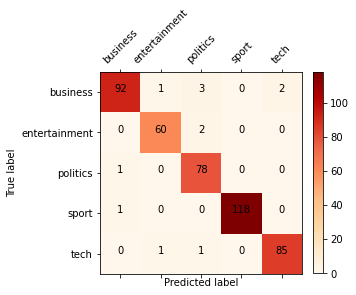

In [20]:
mb = train_MultinomialNB(X_train, y_train)
a('a) Multi-nomialNB default values, try 2')
y_pred = b()
c(y_pred)
d(y_pred)
e()
f()
g()
h()
i()
j()
k()

9. Redo steps 6 and 7 again, but this time, change the smoothing value to 0.0001. Append the results at the
end of bbc-performance.txt.

{'alpha': 0.0001, 'class_prior': None, 'fit_prior': True}
               precision    recall  f1-score   support

     business       0.97      0.97      0.97        98
entertainment       0.95      0.97      0.96        62
     politics       0.96      0.99      0.97        79
        sport       1.00      0.99      1.00       119
         tech       0.99      0.97      0.98        87

     accuracy                           0.98       445
    macro avg       0.97      0.98      0.98       445
 weighted avg       0.98      0.98      0.98       445

Accuracy: 0.9775280898876404
Macro-average F1: 0.9753825063731704
Weighted-average F1: 0.9753825063731704
Priors of each class
business : 0.2292134831460674
entertainment : 0.17348314606741572
politics : 0.18741573033707865
sport : 0.22966292134831462
tech : 0.1802247191011236
29421
business : 164663
entertainment : 124893
politics : 185208
sport : 162953
tech : 198640
836357
Number of words with 0 frequency in class business : 17538
Percen

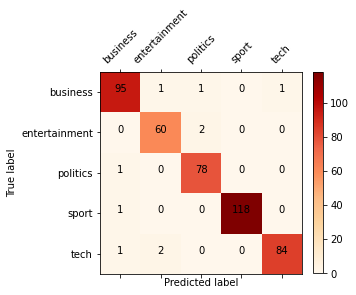

In [21]:
mb = train_MultinomialNB(X_train, y_train, smoothing=0.0001)
a('a) Multi-nomialNB smoothing=0.0001, try 1')
y_pred = b()
c(y_pred)
d(y_pred)
e()
f()
g()
h()
i()
j()
k()

10. Redo steps 6 and 7, but this time, change the smoothing value to 0.9. Append the results at the end of
bbc-performance.txt.

{'alpha': 0.9, 'class_prior': None, 'fit_prior': True}
               precision    recall  f1-score   support

     business       0.98      0.95      0.96        98
entertainment       0.97      0.97      0.97        62
     politics       0.94      0.99      0.96        79
        sport       1.00      0.99      1.00       119
         tech       0.98      0.98      0.98        87

     accuracy                           0.98       445
    macro avg       0.97      0.97      0.97       445
 weighted avg       0.98      0.98      0.98       445

Accuracy: 0.9752808988764045
Macro-average F1: 0.9734455106730386
Weighted-average F1: 0.9734455106730386
Priors of each class
business : 0.2292134831460674
entertainment : 0.17348314606741572
politics : 0.18741573033707865
sport : 0.22966292134831462
tech : 0.1802247191011236
29421
business : 164663
entertainment : 124893
politics : 185208
sport : 162953
tech : 198640
836357
Number of words with 0 frequency in class business : 17538
Percentag

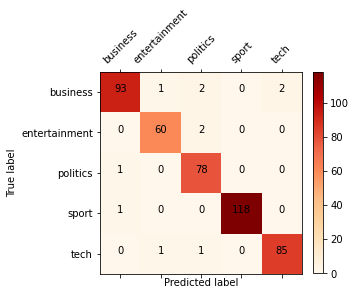

In [22]:
mb = train_MultinomialNB(X_train, y_train, smoothing=0.9)
a('a) Multi-nomialNB smoothing=0.9, try 1')
y_pred = b()
c(y_pred)
d(y_pred)
e()
f()
g()
h()
i()
j()
k()